# 합성곱 네트워크 만들기

> 3.1.4 장에 해당하는 코드

## 패키지 불러오기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# 2.2.8 장에서 정의한 훈련 및 테스트 함수를 불러온다.
from train_utils import train, test, main
# 시각화를 위한 matplotlib
import matplotlib.pyplot as plt

## 데이터 살펴보기 

Files already downloaded and verified
Number of Traing Set 50000, Test Set 10000

Target: car
Size of Image: torch.Size([3, 32, 32])


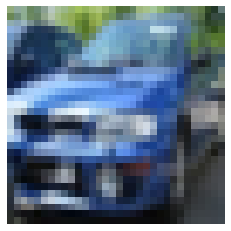

In [3]:
# 코드 3-9

torch.manual_seed(70)
# 데이터 셋 불러오기
train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10('./data', train=False, transform=transforms.ToTensor())
# 데이터 개수 알아보기
print("Number of Traing Set {}, Test Set {}\n".format(len(train_dataset), len(test_dataset)))

# Cifar 10 데이터는 총 10개 카테고리가 포함된 사물이미지가 있다
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 랜덤 이미지 살펴보기 
idx = torch.randint(0, len(train_dataset), (1,)).item()
random_image = train_dataset[idx][0]
target_num = train_dataset[idx][1]

# 해당하는 사물 카테고리 및 이미지 크기 살펴보기
print("Target: {}".format(classes[target_num]))
print("Size of Image: {}".format(random_image.size()))
# plt.imshow 는 (높이, 넓이, 채널) 형태로 입력을 받아야 출력 가능하다.
plt.imshow(random_image.numpy().transpose(1, 2, 0))  
plt.axis("off")
plt.show()

In [4]:
# 환경 변수 설정
BATCH = 128  # 미니배치크기
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # 디바이스
STEP = 30  # 총 반복스텝
PRINT_STEP = 180  # 경과 print 기간

# 데이터로더 선언
train_loader = DataLoader(train_dataset, batch_size=BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH, shuffle=True)

## 합성곱 신경망 네트워크 구축

In [5]:
# 코드 3-10

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.flatten = lambda x: x.view(x.size(0), -1)
        # Convolution Operation Layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=2, stride=1, padding=0)
        # Activation Layer
        self.relu = nn.ReLU(inplace=True)
        # MaxPool Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully Connect Layer
        self.fc = nn.Linear(784, 10)
        
    def forward(self, x): 
        ## Convolutional Layer
        # input: (batch, 3, 32, 32) 
        # > conv1: (batch, 8, 30, 30) 
        # > pool1: (batch, 8, 15, 15)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # > conv2: (batch, 16, 14, 14) 
        # > pool2: (batch, 16, 7, 7)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        ## Fully Connect Layer
        # flatten
        x = self.flatten(x)
        # input: (batch, 32*6*6) > output: (batch, 10)
        x = self.fc(x)
        return x

In [6]:
# 모델 선언
torch.manual_seed(70)
model = CNN().to(DEVICE)
# 손실함수 선언
loss_function = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.Adam(model.parameters()) 

## 훈련 및 테스트

In [7]:
# 코드 3-11

main(model=model, 
     train_loader=train_loader, 
     test_loader=test_loader, 
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     device=DEVICE,
     save_path="cifar10_model.pt", 
     print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 2.3060
Train Step: 1 (46.08%)  	Loss: 1.7408
Train Step: 1 (92.16%)  	Loss: 1.5804
Test set: Average loss: 1.5813, Accuracy: 4380/10000 (43.80%)

Train Step: 2 (00.00%)  	Loss: 1.5674
Train Step: 2 (46.08%)  	Loss: 1.5562
Train Step: 2 (92.16%)  	Loss: 1.4554
Test set: Average loss: 1.4661, Accuracy: 4866/10000 (48.66%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 1.4137
Train Step: 3 (46.08%)  	Loss: 1.3320
Train Step: 3 (92.16%)  	Loss: 1.4532
Test set: Average loss: 1.4189, Accuracy: 4950/10000 (49.50%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 1.2500
Train Step: 4 (46.08%)  	Loss: 1.4422
Train Step: 4 (92.16%)  	Loss: 1.3553
Test set: Average loss: 1.3541, Accuracy: 5191/10000 (51.91%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 1.4818
Train Step: 5 (46.08%)  	Loss: 1.2701
Train Step: 5 (92.16%)  	Loss: 1.3148
Test set: Average loss: 1.3448, Ac

## 더 큰 CNN 모델로 학습 해보기

In [8]:
# 코드 3-12

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# 2.2.8 장에서 정의한 훈련 및 테스트 함수를 불러온다.
from train_utils import train, test, main
# custom_cnn 의 CNN 모델을 불러온다.
from custom_cnn import CNN

# 데이터 셋 불러오기
train_dataset = datasets.CIFAR10('./data', train=True, download=True, 
                                 transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10('./data', train=False, 
                                transform=transforms.ToTensor())

# 환경 변수 설정
BATCH = 128  # 미니배치크기
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # 디바이스
STEP = 30  # 총 반복스텝
PRINT_STEP = 180  # 경과 print 기간
# 모델 환경 변수 설정
config = [
    ('ch_in', 3), ('n_in', 32),
    ('conv1', (32, 7, 1, 1)), ('pool1', 2), 
    ('conv2', (64, 5, 1, 1)), ('pool2', 2), 
    ('conv3', (128, 3, 1, 0)), ('pool3', 2),
    ('fc', (250, 50, 10))
    ]

# 데이터로더 선언
train_loader = DataLoader(train_dataset, batch_size=BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH, shuffle=True)

# 모델 선언
torch.manual_seed(70)
model = CNN(config).to(DEVICE)
# 손실함수 선언
loss_function = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.Adam(model.parameters()) 

main(model=model, 
     train_loader=train_loader, 
     test_loader=test_loader, 
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     device=DEVICE,
     save_path="cifar10_model.pt", 
     print_step=PRINT_STEP)


Files already downloaded and verified
Train Step: 1 (00.00%)  	Loss: 2.3042
Train Step: 1 (46.08%)  	Loss: 1.3712
Train Step: 1 (92.16%)  	Loss: 1.0144
Test set: Average loss: 1.7997, Accuracy: 3780/10000 (37.80%)

Train Step: 2 (00.00%)  	Loss: 1.3052
Train Step: 2 (46.08%)  	Loss: 0.8439
Train Step: 2 (92.16%)  	Loss: 0.9297
Test set: Average loss: 1.3432, Accuracy: 5236/10000 (52.36%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 1.0056
Train Step: 3 (46.08%)  	Loss: 0.7959
Train Step: 3 (92.16%)  	Loss: 0.8460
Test set: Average loss: 0.8912, Accuracy: 6853/10000 (68.53%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 0.8769
Train Step: 4 (46.08%)  	Loss: 0.6495
Train Step: 4 (92.16%)  	Loss: 0.6807
Test set: Average loss: 0.9761, Accuracy: 6605/10000 (66.05%)

Train Step: 5 (00.00%)  	Loss: 0.7416
Train Step: 5 (46.08%)  	Loss: 0.6702
Train Step: 5 (92.16%)  	Loss: 0.7468
Test set: Average loss: 0.9114, Accuracy: 68

## 클래스 별로 정확도 확인하기

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from custom_cnn import CNN

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 데이터 불러오기
test_dataset = datasets.CIFAR10('./data', train=False, 
                                transform=transforms.ToTensor())
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' 
BATCH = 128
test_loader = DataLoader(test_dataset, batch_size=BATCH, shuffle=True)

# config
config = [
    ('ch_in', 3), ('n_in', 32),
    ('conv1', (32, 7, 1, 1)), ('pool1', 2), 
    ('conv2', (64, 5, 1, 1)), ('pool2', 2), 
    ('conv3', (128, 3, 1, 0)), ('pool3', 2),
    ('fc', (250, 50, 10))
    ]

model = CNN(config).to(DEVICE)
# 모델 불러오기
model_path = "./cifar10_model.pt"
model.load_state_dict(torch.load(model_path))

# class 별로 맞춘 개수 계산하는 함수
def cal_correct_by_class(model, test_loader, device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred == target))
            correct += torch.zeros(correct_idx.size(0), 10).scatter(1, correct_idx.view(-1, 1), 1).sum(0)
            total += torch.zeros(target.size(0), 10).scatter(1, target.view(-1, 1), 1).sum(0)
            
    percentage = correct/total

    return percentage

percentage = cal_correct_by_class(model, test_loader, device=DEVICE)
for cls_name, percent in zip(classes, percentage):
    print("{} \t: {:05.2f}%".format(cls_name, percent*100))

plane 	: 75.50%
car 	: 84.10%
bird 	: 61.30%
cat 	: 58.20%
deer 	: 65.90%
dog 	: 63.60%
frog 	: 78.00%
horse 	: 83.70%
ship 	: 89.20%
truck 	: 85.40%
